# Model validation currents

Note: this notebook requires the model output data

<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

### Import packages

In [27]:
import modelskill as ms
import matplotlib.pyplot as plt
import helper as h
import pandas as pd
from pathlib import Path


### Define paths

In [2]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = f"{mr_fldr}Area.dfsu"

In [61]:
def get_swh_point_obs(obs_fldr, station_file):
    """Get wave height point observations as list of PointObservation objects"""
    q = ms.Quantity(name="Significant wave height", unit="m")
    swhlist = []

    df_stn = pd.read_csv(obs_fldr + station_file, index_col=0)

    for i, row in df_stn.iterrows():
        df = pd.read_csv(obs_fldr + f"{i}.csv", index_col=0)
        df.index = pd.to_datetime(df.index, format="ISO8601")
        o = ms.PointObservation(df.VHM0, x=row['lon'], y=row['lat'], name=i, quantity=q)
        swhlist.append(o)

    return swhlist

In [62]:
# Load observation data
swhlist = get_swh_point_obs(obs_fldr = "../observations/", station_file="subset_stations.csv")
swhlist

[<PointObservation>: Europlatform2
 Location: 3.27639, 51.99861
 Time: 2022-01-01 00:00:00 - 2022-12-31 23:50:00
 Quantity: Significant wave height [m],
 <PointObservation>: IJmuidenMunitiestort_
 Location: 4.05833, 52.55
 Time: 2022-01-01 00:00:00 - 2022-12-31 23:50:00
 Quantity: Significant wave height [m],
 <PointObservation>: J61
 Location: 2.95, 53.81663
 Time: 2022-01-01 00:00:00 - 2022-12-31 23:50:00
 Quantity: Significant wave height [m],
 <PointObservation>: K13a_
 Location: 3.22, 53.21778
 Time: 2022-01-01 00:00:00 - 2022-12-31 23:50:00
 Quantity: Significant wave height [m],
 <PointObservation>: WesthinderBuoy
 Location: 2.4358, 51.3811
 Time: 2022-01-01 00:00:00 - 2022-12-31 23:30:00
 Quantity: Significant wave height [m]]

In [63]:
# Load observation data
#ulist, vlist = h.get_u_v_point_obs()

In [64]:
# Load MIKE21 simulation data
mr_swh = ms.DfsuModelResult(mr_fn, name="MIKE21", item=0)
#mr_tp = ms.DfsuModelResult(mr_fn, name="MIKE21", item=1)
mr_swh

<DfsuModelResult>: MIKE21
Time: 2022-01-01 00:00:00 - 2022-12-31 23:00:00
Quantity: Significant wave height [m]

In [65]:
mr_swh

<DfsuModelResult>: MIKE21
Time: 2022-01-01 00:00:00 - 2022-12-31 23:00:00
Quantity: Significant wave height [m]

In [66]:
# swh 
cmps = []
for o in swhlist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_swh))
    except Exception as e:
        print(f"Skipping {o.name} due to error: {e}")

cc_swh = ms.ComparerCollection(cmps)

## Skill tables

In [67]:
# Print statistics for the u-component
cc_swh.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
Europlatform2,51280,0.140,0.307,0.273,0.206,0.962,0.234,0.842
IJmuidenMunitiestort_,49804,0.087,0.258,0.243,0.177,0.965,0.194,0.908
J61,52187,0.140,0.326,0.294,0.233,0.960,0.199,0.877
K13a_,48749,0.106,0.290,0.270,0.206,0.963,0.187,0.898
WesthinderBuoy,17459,0.093,0.254,0.237,0.174,0.954,0.231,0.844


## Scatter plots

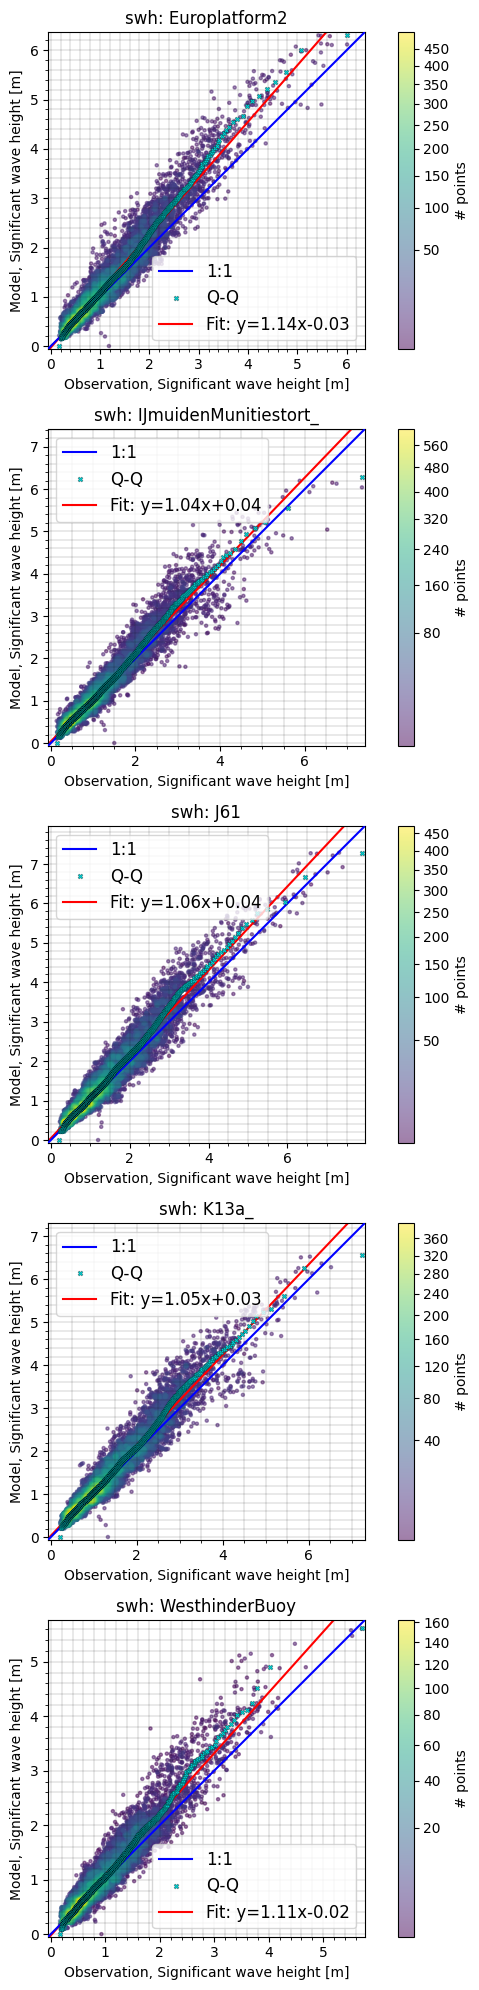

In [68]:
def plot_scatter_swh(cc, x, y):    
    n_points = 10000
    fig, axs = plt.subplots(len(cc), 1, figsize=(9, 4*len(cc)))

    # Make sure axs is always iterable
    if len(cc) == 1:
        axs = [axs]
    else:
        axs = axs.flatten()

    for i in range(len(cc)):
        cc[i].plot.scatter(ax=axs[i], show_points=n_points)
        axs[i].set_title(f"swh: {cc[i].name}")

    plt.tight_layout()
    plt.show()

# Example usage
plot_scatter_swh(cc = cc_swh, x="longitude", y="latitude")


<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

## Timeseries

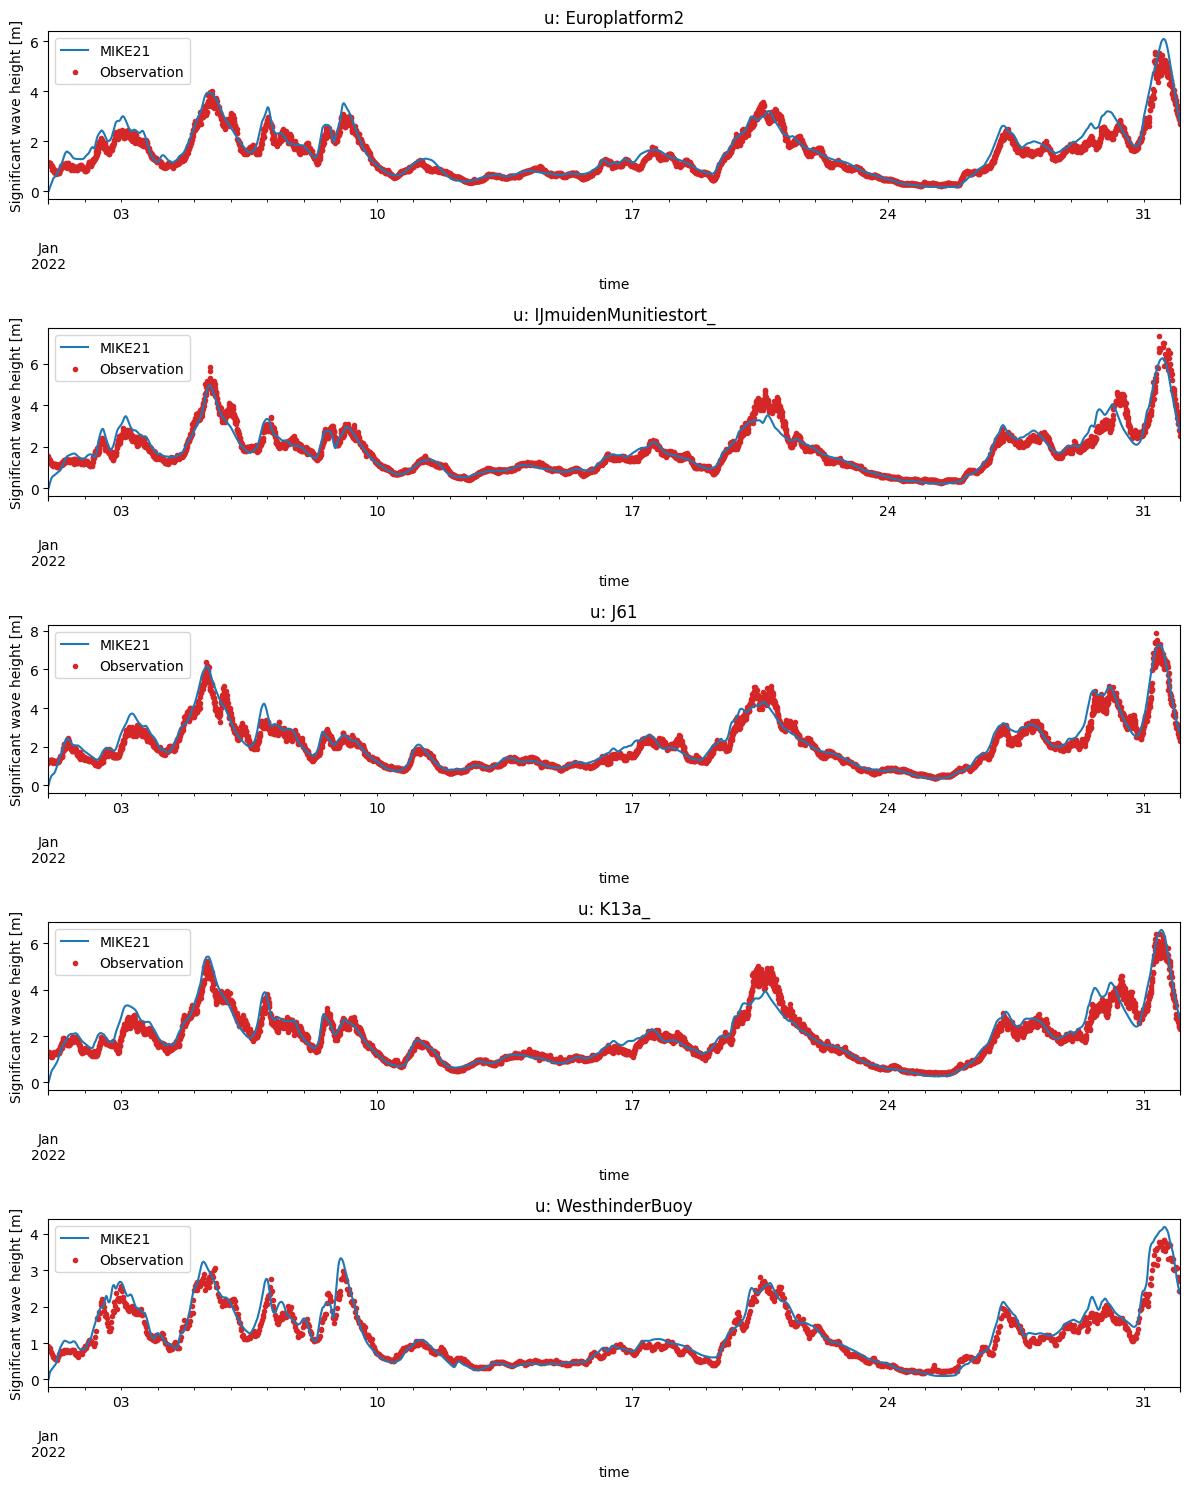

In [69]:
def plot_timeseries_currents(cc):
    time_slice = slice("2022-01","2022-01")
    fig, axs = plt.subplots(len(cc), 1, figsize=(12,3*len(cc)))
    axs = axs.flatten()
    for i in range(len(cc)):
        cc[i].sel(time=time_slice).plot.timeseries(ax=axs[i], title=f"u: {cc[i].name}")
    plt.tight_layout()
    plt.show()

plot_timeseries_currents(cc = cc_swh)